In [1]:
%matplotlib inline

import geopandas
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.shapereader import natural_earth

In [2]:
gdf0 = geopandas.read_file('floripa_adim_level_09.geojson')
gdf1 = geopandas.read_file('floripa_adim_level_10.geojson')

In [3]:
from shapely.ops import cascaded_union


floripa = cascaded_union(gdf0['geometry'].tolist() + gdf1['geometry'].tolist())

In [4]:
import folium


m = folium.Map()
folium.GeoJson(floripa).add_to(m)
m.fit_bounds(m.get_bounds())

m

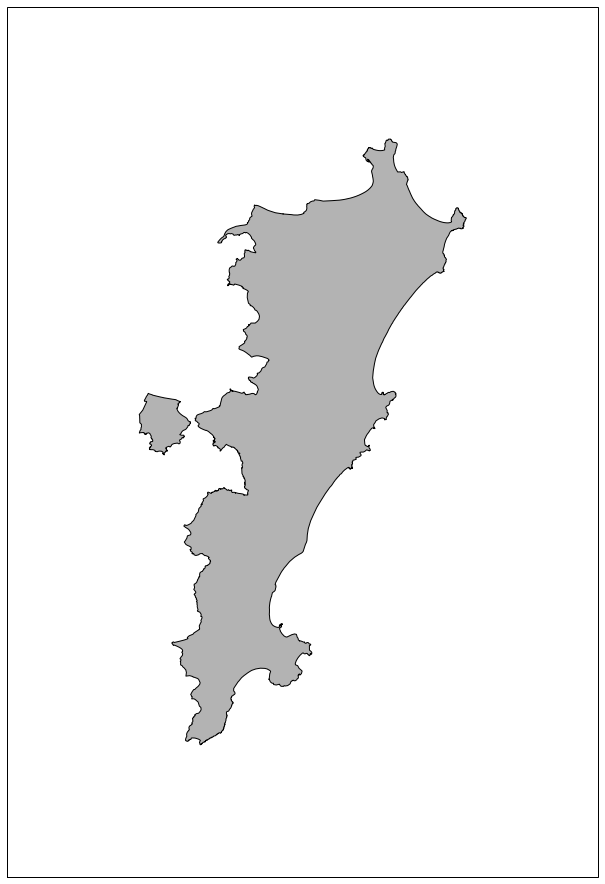

In [5]:
floripaprojection = ccrs.PlateCarree()
dx = dy = 0.1
x0, y0, x1, y1 = floripa.envelope.boundary.bounds

fig, ax = plt.subplots(
    figsize=(16, 16),
    subplot_kw={'projection': floripaprojection},
)

extent = [x0-dx, x1+dx, y0-dy, y1+dy]
ax.set_extent(extent)

ax.add_geometries(floripa, floripaprojection, facecolor='0.7', edgecolor='k')
ax.set_axis_off()